<a href="https://colab.research.google.com/github/karthikmandelli/frugal-labs-/blob/main/soil_moisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Assuming you have two datasets: df1 and df2
# df1 contains columns: date, hour, value1
# df2 contains columns: date, hour, value2
df1 = pd.read_csv("/content/srm0001-smu4g-_4_.csv")
df2 = pd.read_csv("/content/srm0002-wmu4g-_4_.csv")
# Merge the datasets based on date and hour
merged_df = pd.merge(df1, df2, on=['Date'])

# Group the merged dataset by date and hour
grouped_df = merged_df.groupby(['Date'])

# Calculate the average for each group
averaged_df = grouped_df.mean().reset_index()

# The averaged_df will contain the combined dataset with averaged values


average_df = averaged_df.iloc[0:]
average_df

<ipython-input-5-f459537673c0>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averaged_df = grouped_df.mean().reset_index()


,Date,SMF1,SMK1,SMF2,SMK2,TEMPC,LWP,WS,RF,LUX,AirTC,AirHP,AirPP
0,"5/19/2023, 10:00:25 AM",5482.0,4.47,2409.0,16.96,31.56,0.0,13.44,0.0,36893.0,34.88,61.38,1005.76


In [ ]:
import pandas as pd
df1['Date'] = pd.to_datetime(df1["Date"])
df1["date"] = df1["Date"].dt.day
df1["hour"] = df1["Date"].dt.hour
df1["minutes"]= df1["Date"].dt.minute
df1["year"] = df1["Date"].dt.year
df1["month"] = df1["Date"].dt.month
df2['Date'] = pd.to_datetime(df2["Date"])
df2["hour"] = df2["Date"].dt.hour
df2["minutes"]= df2["Date"].dt.minute
df2["date"] =df2["Date"].dt.day
df2["year"] = df2["Date"].dt.year
df2["month"] = df2["Date"].dt.month
df1['minutes_starting_digit'] = df1['minutes']// 10
df2['minutes_starting_digit'] = df2['minutes']// 10

# Merge the datasets based on date, hour, and the starting digit of minutes
merged_df = pd.merge(df1, df2, on=['year','month','date', 'hour'])

# Group the merged dataset by date, hour, and the starting digit of minutes
grouped_df = merged_df.groupby(['year','month','date', 'hour'])

# Calculate the average for each group
averaged_df = grouped_df.mean()
average_df = averaged_df.iloc[:]
average_df

<ipython-input-6-c699392efece>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averaged_df = grouped_df.mean()


SMF1        SMK1         SMF2      SMK2  \
year month date hour                                                   
2023 5     1    0     4861.750000    7.100000  5916.000000  3.030000   
                1     4856.750000    7.137500  5886.000000  3.150000   
                2     4852.333333    7.163333  5855.333333  3.276667   
                3     4851.000000    7.187500  5840.750000  3.340000   
                4     4845.750000    7.227500  5825.750000  3.410000   
...                           ...         ...          ...       ...   
           24   19     331.000000  150.192500  5319.000000  4.932500   
                20     335.000000  149.710000  5316.666667  4.980000   
                21     338.750000  148.872500  5329.500000  4.962500   
                22     342.000000  148.475000  5330.250000  4.992500   
                23     345.500000  147.642500  5319.500000  5.055000   

                          TEMPC  minutes_x  minutes_starting_digit_x  LWP  \
year month date hour                                                        
2023 5     1    0     29.220000       29.0                  2.500000  1.0   
                1     29.090000       33.0                  2.750000  1.0   
                2     28.980000       29.0                  2.333333  1.0   
                3     28.905000       25.0                  2.000000  1.0   
                4     28.765000       29.0                  2.500000  1.0   
...                         ...        ...                       ...  ...   
           24   19    32.750000       33.0                  2.750000  1.0   
                20    32.416667       29.0                  2.333333  1.0   
                21    32.127500       24.0                  2.000000  1.0   
                22    31.872500       28.5                  2.500000  1.0   
                23    31.640000       33.0                  2.750000  1.0   

                        WS   RF  LUX      AirTC      AirHP        AirPP  \
year month date hour                                                      
2023 5     1    0     2.88  0.0  0.0  27.860000  85.185000  1002.272500   
                1     3.36  0.0  0.0  27.470000  87.260000  1001.886667   
                2     4.08  0.0  0.0  27.317500  88.195000  1001.477500   
                3     4.16  0.0  0.0  27.076667  89.220000  1001.423333   
                4     1.92  0.0  0.0  26.947500  88.850000  1001.527500   
...                    ...  ...  ...        ...        ...          ...   
           24   19    5.76  0.0  0.0  31.067500  73.775000  1003.280000   
                20    5.12  0.0  0.0  30.556667  76.306667  1004.266667   
                21    3.96  0.0  0.0  30.220000  78.145000  1005.057500   
                22    4.80  0.0  0.0  30.083333  78.913333  1005.223333   
                23    6.60  0.0  0.0  30.085000  78.167500  1004.820000   

                      minutes_y  minutes_starting_digit_y  
year month date hour                                       
2023 5     1    0     27.500000                  2.250000  
                1     28.000000                  2.333333  
                2     27.500000                  2.250000  
                3     27.666667                  2.333333  
                4     27.500000                  2.250000  
...                         ...                       ...  
           24   19    30.000000                  2.500000  
                20    30.000000                  2.666667  
                21    30.000000                  2.500000  
                22    30.000000                  2.666667  
                23    30.250000                  2.500000  

[491 rows x 16 columns]

For predicting soil moisture, the most relevant dataset features would typically include variables that directly influence or correlate with soil moisture levels. Based on the information you provided, the important dataset features for soil moisture prediction may include:

Soil Temperature: Soil temperature affects the evaporation rate and water-holding capacity of the soil. It is an essential factor for understanding soil moisture dynamics.

Rainfall: Rainfall directly contributes to soil moisture by providing water input to the soil. It is crucial to consider precipitation patterns when predicting soil moisture levels.

Luminosity: Luminosity or solar radiation affects soil moisture through its impact on evapotranspiration. Higher solar radiation levels lead to increased evaporation and can result in lower soil moisture content.

Air Temperature: Air temperature influences the rate of evaporation from the soil. Higher temperatures generally promote faster evaporation, which can decrease soil moisture levels.

Wind Speed: Wind speed affects evaporation by enhancing the movement of air over the soil surface. Higher wind speeds can accelerate evaporation, potentially impacting soil moisture content.

Humidity: Humidity represents the amount of moisture present in the air. Higher humidity levels can slow down evaporation, potentially contributing to higher soil moisture.

Pressure: Atmospheric pressure can indirectly influence soil moisture through its impact on weather patterns. It is useful to consider pressure patterns when analyzing soil moisture dynamics.

These features provide valuable information regarding the environmental conditions that influence soil moisture content. However, it's important to note that the selection of features may vary depending on the specific context, location, and characteristics of the soil. Additionally, domain knowledge and further analysis may be required to identify the most significant features for accurate soil moisture prediction in your specific scenario.







In [ ]:
averaged_df = averaged_df.drop(["SMK2","SMF2",'minutes_x','minutes_starting_digit_x','minutes_y','minutes_starting_digit_y'],axis = 1)
averaged_df

SMF1        SMK1      TEMPC  LWP    WS   RF  LUX  \
year month date hour                                                            
2023 5     1    0     4861.750000    7.100000  29.220000  1.0  2.88  0.0  0.0   
                1     4856.750000    7.137500  29.090000  1.0  3.36  0.0  0.0   
                2     4852.333333    7.163333  28.980000  1.0  4.08  0.0  0.0   
                3     4851.000000    7.187500  28.905000  1.0  4.16  0.0  0.0   
                4     4845.750000    7.227500  28.765000  1.0  1.92  0.0  0.0   
...                           ...         ...        ...  ...   ...  ...  ...   
           24   19     331.000000  150.192500  32.750000  1.0  5.76  0.0  0.0   
                20     335.000000  149.710000  32.416667  1.0  5.12  0.0  0.0   
                21     338.750000  148.872500  32.127500  1.0  3.96  0.0  0.0   
                22     342.000000  148.475000  31.872500  1.0  4.80  0.0  0.0   
                23     345.500000  147.642500  31.640000  1.0  6.60  0.0  0.0   

                          AirTC      AirHP        AirPP  
year month date hour                                     
2023 5     1    0     27.860000  85.185000  1002.272500  
                1     27.470000  87.260000  1001.886667  
                2     27.317500  88.195000  1001.477500  
                3     27.076667  89.220000  1001.423333  
                4     26.947500  88.850000  1001.527500  
...                         ...        ...          ...  
           24   19    31.067500  73.775000  1003.280000  
                20    30.556667  76.306667  1004.266667  
                21    30.220000  78.145000  1005.057500  
                22    30.083333  78.913333  1005.223333  
                23    30.085000  78.167500  1004.820000  

[491 rows x 10 columns]

In [ ]:
averaged_df.corr()

,SMF1,SMK1,TEMPC,LWP,WS,RF,LUX,AirTC,AirHP,AirPP
SMF1,1.000000,-0.904708,-0.508802,0.122780,-0.203721,0.066087,0.003393,-0.111682,0.046043,-0.446875
SMK1,-0.904708,1.000000,0.442236,-0.134809,0.174679,-0.049117,0.017309,0.107439,-0.077542,0.390041
TEMPC,-0.508802,0.442236,1.000000,-0.335385,0.512749,-0.010916,0.204356,0.626103,-0.542147,-0.099946
LWP,0.122780,-0.134809,-0.335385,1.000000,-0.165656,0.208647,-0.183169,-0.332896,0.353207,0.008373
WS,-0.203721,0.174679,0.512749,-0.165656,1.000000,0.136566,0.221818,0.399122,-0.391136,-0.028601
RF,0.066087,-0.049117,-0.010916,0.208647,0.136566,1.000000,-0.030908,-0.065171,0.047608,-0.056608
LUX,0.003393,0.017309,0.204356,-0.183169,0.221818,-0.030908,1.000000,0.672807,-0.765856,0.048418
AirTC,-0.111682,0.107439,0.626103,-0.332896,0.399122,-0.065171,0.672807,1.000000,-0.802463,-0.213764
AirHP,0.046043,-0.077542,-0.542147,0.353207,-0.391136,0.047608,-0.765856,-0.802463,1.000000,0.228138
AirPP,-0.446875,0.390041,-0.099946,0.008373,-0.028601,-0.056608,0.048418,-0.213764,0.228138,1.000000


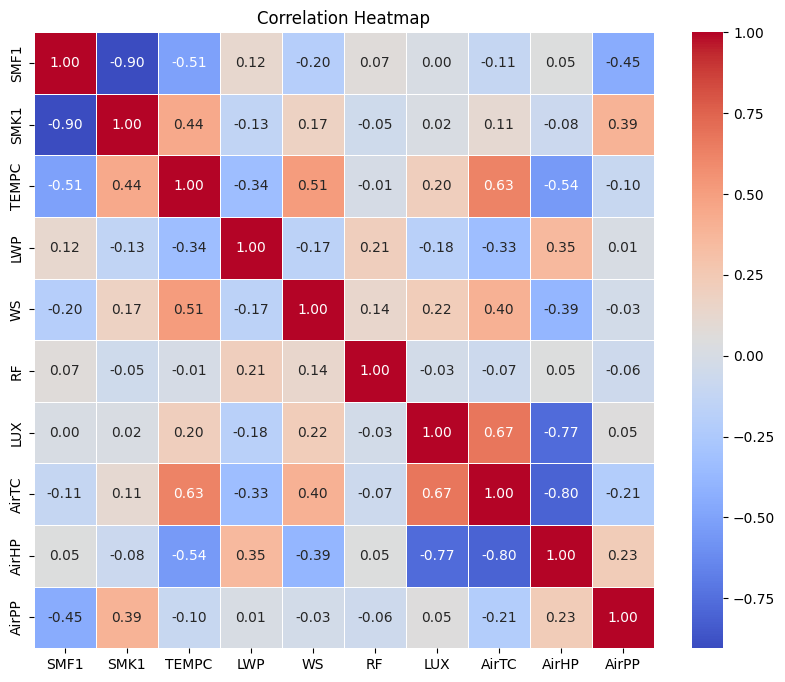

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = averaged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#air temperature with soil temperature

In [ ]:
import  pandas as pd

In [ ]:
df1_mean = df1.groupby('date').mean().reset_index()
df2_mean = df2.groupby('date').mean().reset_index()


<ipython-input-11-7d60d4f8955c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_mean = df1.groupby('date').mean().reset_index()
<ipython-input-11-7d60d4f8955c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_mean = df2.groupby('date').mean().reset_index()


In [ ]:
merged_df = pd.merge(df1_mean, df2_mean, on='date', how='inner')
df1 = pd.read_csv('/content/srm0001-smu4g-_4_.csv', parse_dates=['date'], format='%Y-%m-%d')
df2 = pd.read_csv('/content/srm0002-wmu4g-_4_.csv', parse_dates=['date'], format='%Y-%m-%d')


TypeError: ignored

In [ ]:
averaged_df.to_csv("averaged_df",index = False)

In [ ]:
import pandas as pd

# Load dataset 1
df1 = pd.read_csv("/content/srm0001-smu4g-_4_.csv")

# Load dataset 2
df2 = pd.read_csv("/content/srm0002-wmu4g-_4_.csv")

# Convert 'Time' column in df1 to datetime
df1['Time'] = pd.to_datetime(df1['Date'])

# Define hour slots for df1
slots = ['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM']

# Map 'Time' to the corresponding hour slot in df1
df1['Hour Slot'] = pd.cut(df1['Time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=slots, right=False)

# Convert 'Time' column in df2 to datetime
df2['Time'] = pd.to_datetime(df2['Date'])

# Define hour slots for df2
slots = ['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM']

# Map 'Time' to the corresponding hour slot in df2
df2['Hour Slot'] = pd.cut(df2['Time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=slots, right=False)

# Merge df1 and df2 based on the 'Date' column
combined_data = pd.merge(df2, df1, on="Hour Slot")

# Print the combined dataset
print(combined_data)


                        Date_x  LWP    WS   WD   RF  LUX  AirTC  AirHP  \
0       5/24/2023, 11:56:18 PM    1  5.76   se  0.0    0  29.96  78.06   
1       5/24/2023, 11:56:18 PM    1  5.76   se  0.0    0  29.96  78.06   
2       5/24/2023, 11:56:18 PM    1  5.76   se  0.0    0  29.96  78.06   
3       5/24/2023, 11:56:18 PM    1  5.76   se  0.0    0  29.96  78.06   
4       5/24/2023, 11:56:18 PM    1  5.76   se  0.0    0  29.96  78.06   
...                        ...  ...   ...  ...  ...  ...    ...    ...   
715538   5/1/2023, 12:02:31 AM    1  3.84  wnw  0.0    0  27.94  84.94   
715539   5/1/2023, 12:02:31 AM    1  3.84  wnw  0.0    0  27.94  84.94   
715540   5/1/2023, 12:02:31 AM    1  3.84  wnw  0.0    0  27.94  84.94   
715541   5/1/2023, 12:02:31 AM    1  3.84  wnw  0.0    0  27.94  84.94   
715542   5/1/2023, 12:02:31 AM    1  3.84  wnw  0.0    0  27.94  84.94   

          AirPP              Time_x Hour Slot                  Date_y  SMF1  \
0       1004.60 2023-05-24 23:56

In [ ]:
combined_data

,Date_x,LWP,WS,WD,RF,LUX,AirTC,AirHP,AirPP,Time_x,Hour Slot,Date_y,SMF1,SMK1,SMF2,SMK2,TEMPC,Time_y
0,"5/24/2023, 11:56:18 PM",1,5.76,se,0.0,0,29.96,78.06,1004.60,2023-05-24 23:56:18,6PM-12AM,"5/24/2023, 11:57:14 PM",347,147.38,5333,5.02,31.56,2023-05-24 23:57:14
1,"5/24/2023, 11:56:18 PM",1,5.76,se,0.0,0,29.96,78.06,1004.60,2023-05-24 23:56:18,6PM-12AM,"5/24/2023, 11:41:17 PM",347,146.98,5321,5.05,31.62,2023-05-24 23:41:17
2,"5/24/2023, 11:56:18 PM",1,5.76,se,0.0,0,29.96,78.06,1004.60,2023-05-24 23:56:18,6PM-12AM,"5/24/2023, 11:25:20 PM",345,147.66,5316,5.06,31.69,2023-05-24 23:25:20
3,"5/24/2023, 11:56:18 PM",1,5.76,se,0.0,0,29.96,78.06,1004.60,2023-05-24 23:56:18,6PM-12AM,"5/24/2023, 11:09:24 PM",343,148.55,5308,5.09,31.69,2023-05-24 23:09:24
4,"5/24/2023, 11:56:18 PM",1,5.76,se,0.0,0,29.96,78.06,1004.60,2023-05-24 23:56:18,6PM-12AM,"5/24/2023, 10:53:25 PM",343,148.34,5325,5.02,31.81,2023-05-24 22:53:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715538,"5/1/2023, 12:02:31 AM",1,3.84,wnw,0.0,0,27.94,84.94,1002.55,2023-05-01 00:02:31,12AM-6AM,"5/1/2023, 1:09:49 AM",4847,7.17,5882,3.16,29.12,2023-05-01 01:09:49
715539,"5/1/2023, 12:02:31 AM",1,3.84,wnw,0.0,0,27.94,84.94,1002.55,2023-05-01 00:02:31,12AM-6AM,"5/1/2023, 12:53:50 AM",4866,7.09,5901,3.09,29.19,2023-05-01 00:53:50
715540,"5/1/2023, 12:02:31 AM",1,3.84,wnw,0.0,0,27.94,84.94,1002.55,2023-05-01 00:02:31,12AM-6AM,"5/1/2023, 12:37:52 AM",4854,7.13,5921,3.01,29.19,2023-05-01 00:37:52
715541,"5/1/2023, 12:02:31 AM",1,3.84,wnw,0.0,0,27.94,84.94,1002.55,2023-05-01 00:02:31,12AM-6AM,"5/1/2023, 12:21:53 AM",4866,7.08,5921,3.01,29.25,2023-05-01 00:21:53
